In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('After_cleaning.csv')

In [3]:
df.head()

,Unnamed: 0,location,total_sqft,bath,balcony,price,ready_to_move,bedrooms
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,2
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4
2,2,Uttarahalli,1440.0,2.0,3.0,62.00,1,3
3,3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,3
4,4,Kothanur,1200.0,2.0,1.0,51.00,1,2


In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.head()

,location,total_sqft,bath,balcony,price,ready_to_move,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,3
4,Kothanur,1200.0,2.0,1.0,51.00,1,2


In [7]:
#we will create new feature of price per sqft
#as it will help us to remove outliers

In [8]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [9]:
df.head()

,location,total_sqft,bath,balcony,price,ready_to_move,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,1,2,4250.000000


In [11]:
df['location'].value_counts()

Whitefield                                        513
Sarjapur  Road                                    372
Electronic City                                   300
Kanakpura Road                                    259
Thanisandra                                       230
Yelahanka                                         206
Uttarahalli                                       186
Hebbal                                            173
Raja Rajeshwari Nagar                             168
Marathahalli                                      164
7th Phase JP Nagar                                146
Bannerghatta Road                                 144
Hennur Road                                       142
Haralur Road                                      135
Electronic City Phase II                          130
Rajaji Nagar                                       99
Chandapura                                         98
Bellandur                                          91
Hoodi                       

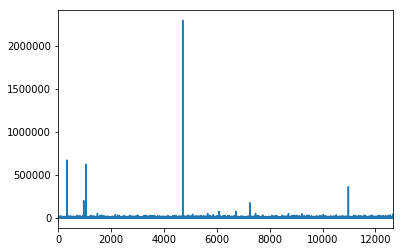

In [13]:
df['price_per_sqft'].plot()

In [23]:
df[df['price_per_sqft']>40000]

,location,total_sqft,bath,balcony,price,ready_to_move,bedrooms,price_per_sqft
333,Suragajakkanahalli,11.0,3.0,2.0,74.0,0,3,6.727273e+05
965,Weavers Colony,15.0,1.0,0.0,30.0,1,1,2.000000e+05
1058,Grihalakshmi Layout,24.0,2.0,2.0,150.0,1,5,6.250000e+05
1485,Uttarahalli,400.0,5.0,1.0,200.0,1,5,5.000000e+04
4711,Srirampuram,5.0,7.0,3.0,115.0,1,7,2.300000e+06
5082,Banashankari Stage II,1500.0,2.0,0.0,650.0,1,4,4.333333e+04
5654,Mysore Road,45.0,1.0,0.0,23.0,1,1,5.111111e+04
6082,Bommenahalli,2940.0,3.0,2.0,2250.0,0,4,7.653061e+04
6717,Srirampuram,650.0,1.0,3.0,500.0,1,1,7.692308e+04
7250,Raghuvanahalli,425.0,1.0,1.0,750.0,1,1,1.764706e+05


In [27]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df['location'].value_counts().sort_values(ascending=False)

Whitefield                                            513
Sarjapur  Road                                        372
Electronic City                                       300
Kanakpura Road                                        259
Thanisandra                                           230
Yelahanka                                             206
Uttarahalli                                           186
Hebbal                                                173
Raja Rajeshwari Nagar                                 168
Marathahalli                                          164
7th Phase JP Nagar                                    146
Bannerghatta Road                                     144
Hennur Road                                           142
Haralur Road                                          135
Electronic City Phase II                              130
Rajaji Nagar                                           99
Chandapura                                             98
Bellandur     

In [28]:
df['location']=df['location'].apply(lambda x:x.strip())

In [33]:
loc_stats=df['location'].value_counts()

In [34]:
len(loc_stats)

1248

In [37]:
len(loc_stats[loc_stats>10])

235

In [41]:
len(loc_stats[loc_stats<=10])

1013

In [40]:
len(loc_stats[loc_stats==10])

12

In [42]:
loc_less_than_10=loc_stats[loc_stats<=10]

In [44]:
len(loc_less_than_10)

1013

In [47]:
len(df.location.unique())

1248

In [49]:
df.location=df['location'].apply(lambda x:'other' if x in loc_less_than_10 else x)

In [54]:
len(df.location.unique())       #236 are locations and unique locations less than 10 are converted into other location

236

In [55]:
df.head()

,location,total_sqft,bath,balcony,price,ready_to_move,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,1,2,4250.000000


In [56]:
## outlier removal